In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
def softmax(x):
  exp_element=np.exp(x-x.max())
  return exp_element/np.sum(exp_element, keepdims=True, axis=0)

def d_softmax(x):
  exp_element=np.exp(x-x.max())
  return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

def relu(x):
  return np.maximum(0,x)
  
def d_relu(da,z):
  dz = np.array(da, copy=True)
  dz[z<=0] = 0
  dz[z>0] = 1
  return dz

def sigmoid(x):
  return 1/(np.exp(-x)+1)

def d_sigmoid(x):
  return (np.exp(-x))/((np.exp(-x)+1)**2)

def one_hot(row_vector, no_classes):
  one_hot_vector = np.eye(no_classes)[row_vector.reshape(-1)]
  return one_hot_vector.T

In [3]:
class NeuralNet:

  def __init__(self, layers):
    self.num_layers = len(layers)
    num_layers = self.num_layers
    self.W = []
    self.B = []
    for i in range(1, self.num_layers):
      self.W.append(np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1]))
      self.B.append(np.zeros((layers[i],1)))

  def forward(self, X):
    self.Z = []
    self.A = []
    self.A.append(X)   
    for i in range(1, self.num_layers-1):
      self.Z.append(np.dot(self.W[i-1], self.A[i-1]) + self.B[i-1])
      self.A.append(relu(self.Z[i-1]))
    self.Z.append(np.dot(self.W[self.num_layers-2], self.A[self.num_layers-2]) + self.B[self.num_layers-2])
    self.A.append(softmax(self.Z[self.num_layers-2]))
    return self.Z, self.A

  def cost(self, Y):
    self.L = -np.sum(Y*np.log(self.A[self.num_layers-1] + 10**-7), keepdims=True, axis=0)
    self.J = np.sum(self.L, keepdims=True, axis=1)/60000
    return self.L, self.J

  def accuracy(self, Y):
    self.acc = np.multiply(self.A[-1], Y)
    self.acc = np.sum(self.acc)/600
    return self.acc

  def backward(self, Y):
    self.dA = []
    self.dB = []
    self.dW = []
    self.dZ = []
    self.dZ.append(self.A[self.num_layers-1] - Y)
    self.dW.append(np.dot(self.dZ[0], self.A[self.num_layers-2].T)/60000)
    self.dB.append(np.sum(self.dZ[0], axis=1, keepdims=True)/60000)
    self.dA.append(np.dot(self.W[self.num_layers-2].T, self.dZ[0]))
    for i in range(1,self.num_layers-1):
      self.dZ.append(np.multiply(self.dA[i-1], d_relu(self.dA[i-1], self.Z[self.num_layers-i-2])))
      self.dW.append(np.dot(self.dZ[i], self.A[self.num_layers-i-2].T)/60000)
      self.dB.append(np.sum(self.dZ[i], axis=1, keepdims=True)/60000)
      self.dA.append(np.dot(self.W[self.num_layers-i-2].T, self.dZ[i]))
    return self.dA, self.dB, self.dW, self.dZ

  def gradient(self, alpha):
    for i in range(0,self.num_layers-1):
      self.W[i] = self.W[i] - (alpha)*(self.dW[self.num_layers-i-2])
      self.B[i] = self.B[i] - (alpha)*(self.dB[self.num_layers-i-2])
    return self.W, self.B

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[0], -1).T
x_train = x_train.astype(float)
x_test = x_test.astype(float)
x_train /= 255
x_test /= 255
y_train = one_hot(y_train, 10)
y_test = one_hot(y_test, 10)
assert x_train.shape == (784, 60000)
assert x_test.shape == (784, 10000)
assert y_train.shape == (10, 60000)
assert y_test.shape == (10, 10000)

11490434/11490434 [==============================] - 0s 0us/step


In [28]:
net = NeuralNet([784, 512, 392, 128, 32, 10])
print(np.shape(net.B[3]))
z, a = net.forward(x_train)
print(np.shape(a[0]))
da, db, dw, dz = net.backward(y_train)
print(np.shape(dw[3]))
w, b = net.gradient(0.01)
print(np.shape(w[0]))

(32, 1)
(784, 60000)
(392, 512)
(512, 784)


In [24]:
Net = NeuralNet([784, 392, 196, 10])

In [25]:
cost_func = []
accuracy = []
for j in range(0,201):
  Net.forward(x_train)
  L, J = Net.cost(y_train)
  acc = Net.accuracy(y_train)
  cost_func.append(np.squeeze(J))
  accuracy.append(acc)
  if j%5 ==0:
      print(f'epoch : {j} / cost : {np.squeeze(J)} / accuracy : {acc}')
  Net.backward(y_train)
  Net.gradient(0.03)

epoch : 0 / cost : 2.398062793763751 / accuracy : 10.05459891349267
epoch : 5 / cost : 2.1768684525591877 / accuracy : 11.828462984824949
epoch : 10 / cost : 2.0113323626403434 / accuracy : 13.934106356826323
epoch : 15 / cost : 1.8638734944623951 / accuracy : 16.38735873172521
epoch : 20 / cost : 1.7246763155883842 / accuracy : 19.18520455423538
epoch : 25 / cost : 1.5921368579063166 / accuracy : 22.29143114445256
epoch : 30 / cost : 1.4672973123707516 / accuracy : 25.638971402033317
epoch : 35 / cost : 1.3520953876621864 / accuracy : 29.127164049544415
epoch : 40 / cost : 1.2479024070788294 / accuracy : 32.64230188810938
epoch : 45 / cost : 1.1552814130952929 / accuracy : 36.078566341407445
epoch : 50 / cost : 1.0740081133960602 / accuracy : 39.35212318749019
epoch : 55 / cost : 1.0031762381803748 / accuracy : 42.41217751043716
epoch : 60 / cost : 0.9416902888486467 / accuracy : 45.23226216858262
epoch : 65 / cost : 0.8882387866101107 / accuracy : 47.8108962449671
epoch : 70 / cost :

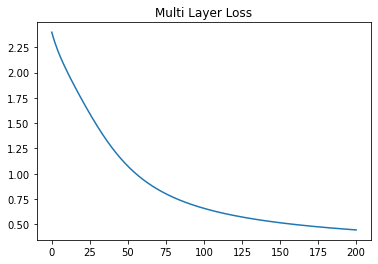

In [26]:
plt.plot(cost_func)
plt.title("Multi Layer Loss")
plt.show()

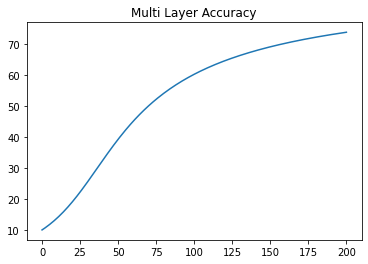

In [27]:
plt.plot(accuracy)
plt.title("Multi Layer Accuracy")
plt.show()